# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [91]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")
#sep="\t" called tab separeted values

### Step 4. See the first 10 entries

In [92]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [93]:
# Solution 1
chipo.shape[0]

4622

In [94]:
# Solution 2

chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [95]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [96]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [97]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [98]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

In [99]:
len(chipo.order_id[chipo.item_name == 'Chicken Bowl'])

726

### Step 11. What was the most ordered item in the choice_description column?

### Step 12. How many items were orderd in total?

In [100]:
item_quantity_count = chipo.quantity.sum()
item_quantity_count

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [101]:
chipo.item_price.dtype
# O stands for object # a string can be stored in string or object or unicode

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [102]:
without_dollar_sign = lambda x : float(x[1:])
chipo.item_price = chipo.item_price.apply(without_dollar_sign)# apply the without_dollar_sign for each row in the dataset

#### Step 13.c. Check the item price type

In [103]:
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [104]:
revenue = (chipo['quantity']*chipo['item_price']).sum()
print(revenue)

39237.02


### Step 15. How many orders were made in the period?

In [105]:
orders = chipo.order_id.value_counts().count()
#value_counts() --> count each id is repeate dhow many times
#count() --> counts the number of rows
#orders = len(chipo.groupby(['order_id'])) #but it takes more memory
orders

1834

### Step 16. What is the average revenue amount per order?

In [106]:
# Solution 1
chipo['revenue'] = chipo['quantity']*chipo['item_price']
order_grouped = chipo.groupby(by= ['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [107]:
# Solution 2
chipo.groupby(by=['order_id']).sum().mean()['revenue']


21.394231188658654

### Step 17. How many different items are sold?

In [108]:
# Solution 1
chipo.item_name.value_counts().count()

50

In [109]:
# Solution 2
len(chipo.item_name.unique())

50

<h3>Plot the 10 most ordered items</h3>

<AxesSubplot:xlabel='item_name'>

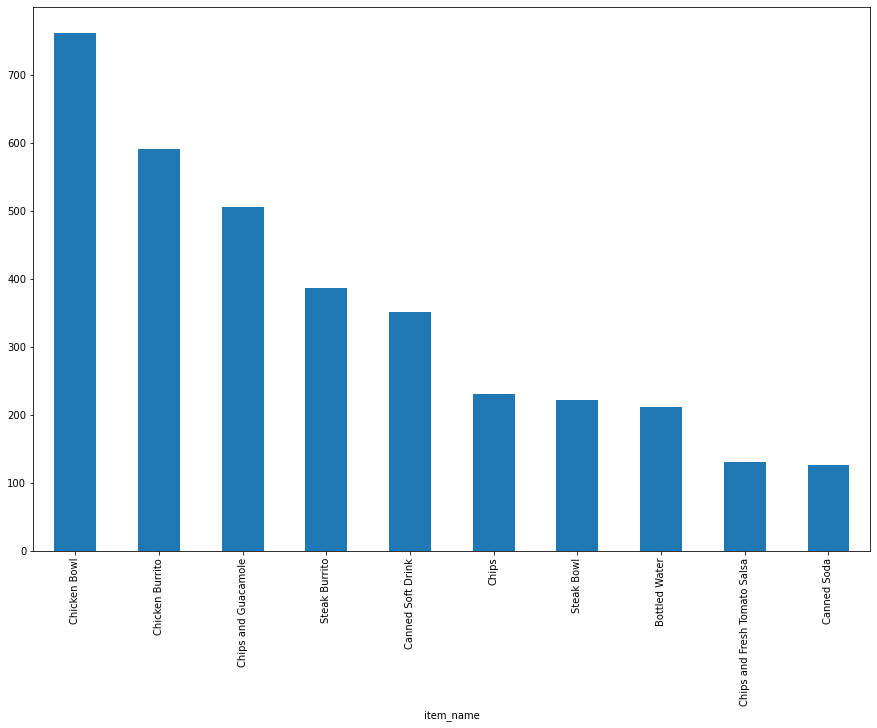

In [110]:
bins = range(0,150,10)
fig, ax = plt.subplots(figsize=(15,10))
most_ordered = chipo.groupby('item_name')
most_ordered = most_ordered.sum()
most_ordered = most_ordered.sort_values(['quantity'], ascending=False)
most_ordered.head(10)['quantity'].plot(kind="bar")